In [12]:
#importando as bibliotecas necessárias para o pipeline de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
#carregando a base de dados
database = pd.read_csv('rotatividade_clientes.csv')

#visualizando as 10 primeiras instâncias da base de dados
database.head(10)

,Idoso,Tempo de permanência,Valor mensal,Valor total,Sexo,Solteiro,Dependentes,Serviço telefônico,Várias linhas telefônicas,Provedor DSL,...,Streaming de filmes,Contrato de mês a mês,Contrato de um ano,Contrato de dois anos,Fatura digital,Pgto transferência bancária,Pgto cartão de crédito,Pgto cheque eletrônico,Pgto cheque enviado,Rotatividade
0,0,1,29.85,29.85,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
5,0,8,99.65,820.50,0,0,0,1,1,0,...,1,1,0,0,1,0,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0
7,0,10,29.75,301.90,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,28,104.80,3046.05,0,1,0,1,1,0,...,1,1,0,0,1,0,0,1,0,1
9,0,62,56.15,3487.95,1,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


Rotatividade
0    5163
1    1869
Name: count, dtype: int64


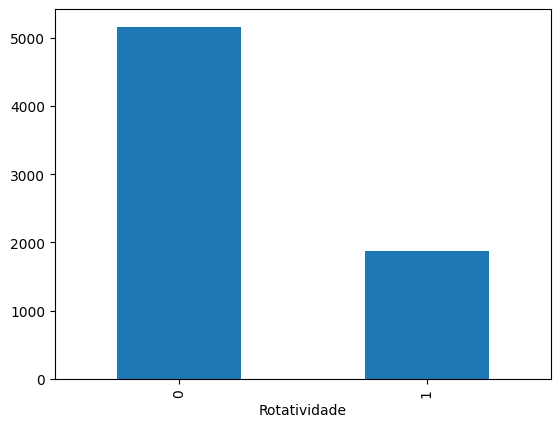

In [3]:
#visualizando o quantitativo por classe
database['Rotatividade'].value_counts().plot(kind='bar')
print(database['Rotatividade'].value_counts())

In [8]:
#separando as variáveis explicativas da classe
X = database.drop('Rotatividade', axis = 1)
y = database['Rotatividade']

In [9]:
#dividindo a base de dados nos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 25), (1407, 25), (5625,), (1407,))

In [16]:
#treinando o modelo preditivo Regressão Logística
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

#realizando a predição no conjunto de teste e avaliando a sua acurácia
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2%}')

Acurácia: 79.10%


In [36]:
#treinando o modelo preditivo K-Vizinhos mais Próximos
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)

#realizando a predição no conjunto de teste e avaliando a sua acurácia
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2%}')

Acurácia: 78.54%


In [42]:
#treinando o modelo preditivo Máquina de Vetores de Suporte
model = SVC()
model.fit(X_train, y_train)

#realizando a predição no conjunto de teste e avaliando a sua acurácia
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2%}')

Acurácia: 73.42%


In [44]:
#treinando o modelo preditivo Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#realizando a predição no conjunto de teste e avaliando a sua acurácia
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc:.2%}')

Acurácia: 72.99%


Text(0.5, 1.0, 'Matriz de Confusão')

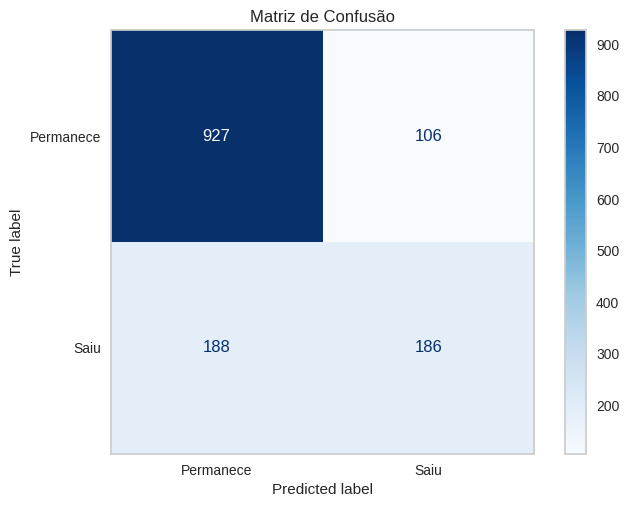

In [27]:
#visualizando a matriz de confusão
disp = metrics.ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['Permanece', 'Saiu'],
        cmap=plt.cm.Blues
    )

plt.grid(False)
disp.ax_.set_title('Matriz de Confusão')

# **A partir desta célula, foram utilizadas bibliotecas de meta-learning para definição da técnica de ML**

In [45]:
#instalando uma biblioteca adicional para análise de vários classificadores
!pip install lazypredict

In [54]:
#treinando e testando várias técnicas de ML para classificação
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy', ascending=False)

 97%|█████████▋| 28/29 [00:21<00:00,  1.45it/s]

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.80,0.70,0.70,0.79,2.34
LinearSVC,0.79,0.70,0.70,0.79,1.15
RidgeClassifierCV,0.79,0.70,0.70,0.78,0.08
RidgeClassifier,0.79,0.70,0.70,0.78,0.05
LinearDiscriminantAnalysis,0.79,0.71,0.71,0.79,0.10
LogisticRegression,0.79,0.70,0.70,0.78,0.15
AdaBoostClassifier,0.78,0.69,0.69,0.77,0.50
NuSVC,0.78,0.65,0.65,0.76,3.03
SVC,0.78,0.69,0.69,0.77,2.85


In [8]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.7

In [4]:
#treinando e testando várias técnicas de ML para classificação
from pycaret.classification import *
s = setup(database, target = 'Rotatividade', session_id = 123)
best = compare_models()
best

,Description,Value
0,Session id,123
1,Target,Rotatividade
2,Target type,Binary
3,Original data shape,"(7032, 26)"
4,Transformed data shape,"(7032, 26)"
5,Transformed train set shape,"(4922, 26)"
6,Transformed test set shape,"(2110, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8025,0.8452,0.5489,0.6531,0.5961,0.4668,0.4701,2.0420
ada,Ada Boost Classifier,0.8025,0.8452,0.5191,0.6660,0.5822,0.4557,0.4625,0.2940
ridge,Ridge Classifier,0.8011,0.8369,0.5237,0.6594,0.5832,0.4549,0.4605,0.1180
gbc,Gradient Boosting Classifier,0.8007,0.8454,0.5184,0.6602,0.5802,0.4521,0.4581,0.8470
lda,Linear Discriminant Analysis,0.7993,0.8368,0.5574,0.6415,0.5962,0.4635,0.4658,0.0430
lightgbm,Light Gradient Boosting Machine,0.7944,0.8312,0.5398,0.6342,0.5828,0.4476,0.4504,0.5300
rf,Random Forest Classifier,0.7911,0.8223,0.4962,0.6377,0.5578,0.4240,0.4298,0.8510
xgboost,Extreme Gradient Boosting,0.7802,0.8156,0.5191,0.6005,0.5565,0.4115,0.4136,0.2580
et,Extra Trees Classifier,0.7747,0.7965,0.4732,0.5956,0.5266,0.3815,0.3863,0.5450
knn,K Neighbors Classifier,0.7672,0.7510,0.4626,0.5779,0.5133,0.3629,0.3670,0.1600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Idoso', 'Tempo de permanência',
                                              'Valor mensal', 'Valor total',
                                              'Sexo', 'Solteiro', 'Dependentes',
                                              'Serviço telefônico',
                                              'Várias linhas telefônicas',
                                              'Provedor DSL',
                                              'Provedor fibra óptica',
                                              'Segurança online',
                                              'Backup online',
                                              'Proteção do dispositivo',
                                              'Suporte técnico'...
                  TransformerWrapper(exclude=None, include=None,
                       

In [10]:
loaded_model = load_model('my_best_pipeline')
y_pred = loaded_model.predict(X_test)
y_pred

Transformation Pipeline and Model Successfully Loaded


array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [55]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=58abbb48f7cbbbe6d2f5adddcf241f491a09d1dcea86ee86272e7a7cabbb9ee6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [6]:
#treinando e testando várias técnicas de ML para classificação
import tpot

tpot = tpot.TPOTClassifier(generations=5, population_size=20, verbosity = 2, scoring='accuracy')
tpot.fit(X_train, y_train)

tpot.score(X_test, y_test)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8055111111111112

Generation 2 - Current best internal CV score: 0.8055111111111112

Generation 3 - Current best internal CV score: 0.8083555555555556

Generation 4 - Current best internal CV score: 0.8083555555555556

Generation 5 - Current best internal CV score: 0.8083555555555556

Best pipeline: LogisticRegression(GaussianNB(input_matrix), C=0.01, dual=False, penalty=l2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7917555081734187

In [7]:
#exportando o melhor modelo para um script Python
tpot.export('best_pipeline.py')